# Примеры изображений из датасетов

В этом ноутбуке представлены примеры изображений из трех датасетов:
1. CUB (Caltech-UCSD Birds) - датасет птиц
2. DTD (Describable Textures Dataset) - датасет текстур
3. Fungi CLEF 2022 - датасет грибов

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets.cub_dataset import CUBDataset
from datasets.dtd_dataset import DTDDataset
from datasets.fungi_clef_2022_dataset import FungiCLEF2022Dataset
from PIL import Image
import random
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

# Настройка отображения для поддержки русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

## Функция для отображения примеров

In [7]:
def show_examples(dataset, n_examples=5, title=""):
    image_paths, labels = dataset.get_samples(n_examples)
    classnames = dataset.get_classnames()
    
    plt.figure(figsize=(15, 3*n_examples))
    plt.suptitle(title, fontsize=16, y=1.02)
    
    for i, (img_path, label) in enumerate(zip(image_paths, labels)):
        plt.subplot(n_examples, 1, i+1)
        img = Image.open(img_path)
        plt.imshow(img)
        
        # Форматирование метки класса
        class_name = classnames[label]
        if isinstance(class_name, str):
            # Заменяем подчеркивания на пробелы и делаем первую букву заглавной
            class_name = class_name.replace('_', ' ').title()
        
        plt.title(f'Пример {i+1}: {class_name}', pad=10, fontsize=12)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Вывод информации о классах
    print(f"\nВсего классов в датасете: {len(classnames)}")
    print("\nПримеры классов:")
    for i, class_name in enumerate(random.sample(classnames, min(5, len(classnames)))):
        if isinstance(class_name, str):
            class_name = class_name.replace('_', ' ').title()
        print(f"{i+1}. {class_name}")

## Примеры из CUB Dataset (Птицы)

TypeError: list indices must be integers or slices, not str

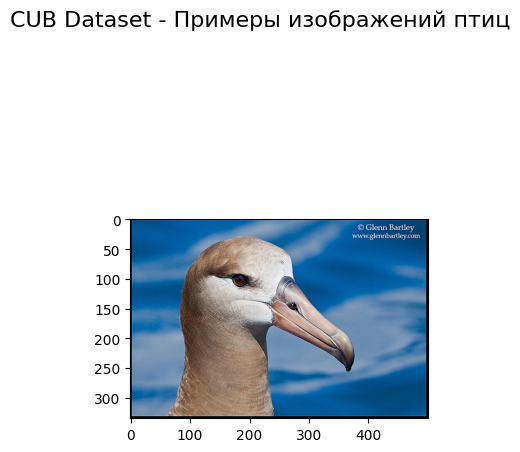

In [8]:
cub_dataset = CUBDataset()
show_examples(cub_dataset, title="CUB Dataset - Примеры изображений птиц")

## Примеры из DTD Dataset (Текстуры)

TypeError: list indices must be integers or slices, not str

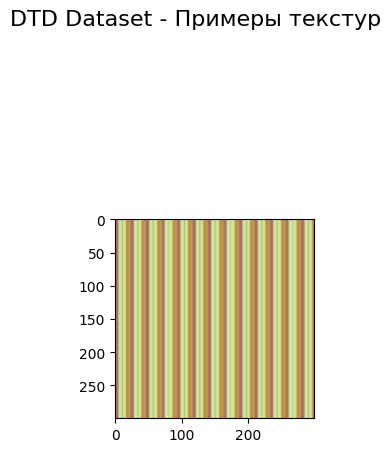

In [9]:
dtd_dataset = DTDDataset()
show_examples(dtd_dataset, title="DTD Dataset - Примеры текстур")

## Примеры из Fungi CLEF 2022 Dataset (Грибы)

TypeError: list indices must be integers or slices, not str

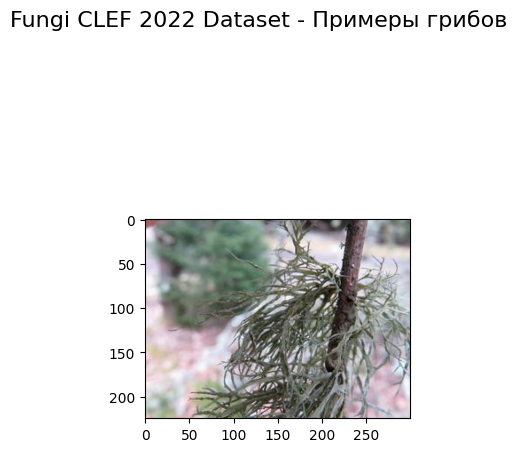

In [10]:
fungi_dataset = FungiCLEF2022Dataset()
show_examples(fungi_dataset, title="Fungi CLEF 2022 Dataset - Примеры грибов")

## Статистика по датасетам

In [ ]:
datasets_info = {
    'CUB': {
        'Количество классов': len(cub_dataset.get_classnames()),
        'Описание': 'Датасет птиц'
    },
    'DTD': {
        'Количество классов': len(dtd_dataset.get_classnames()),
        'Описание': 'Датасет текстур'
    },
    'Fungi CLEF 2022': {
        'Количество классов': len(fungi_dataset.get_classnames()),
        'Описание': 'Датасет грибов'
    }
}

df = pd.DataFrame.from_dict(datasets_info, orient='index')
df.style.set_caption('Статистика по датасетам').set_properties(**{'text-align': 'left'})

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('merged_dataset_v2.csv')

# Assuming the dataset has columns 'dataset' (train/test/val) and 'class'
# Group by dataset and class to count samples
grouped = df.groupby(['class_name', 'domain', 'split']).size().reset_index(name='count')

# Calculate average images per class
average_per_class = grouped.groupby('domain')['count'].mean()

# Count total classes and samples in each dataset
total_classes = grouped.groupby(['domain', 'split'])['class_name'].nunique()
total_samples = grouped.groupby(['domain', 'split'])['count'].sum()

# Display results
for dataset in ['train_new', 'test', 'val']:
    print(f"{dataset.capitalize()}:")
    print(f"  Average images per class: {average_per_class['split']==dataset}")
    print(f"  Total classes: {total_classes['split']==dataset}")
    print(f"  Total samples: {total_samples['split']==dataset}")

Train_new:


KeyError: 'split'

In [12]:
total_classes

domain                 split    
CUB_200_2011_split     test          70
                       train        130
                       train_new    130
                       val          200
dtd_split              test          18
                       train         29
                       train_new     29
                       val           47
fungi_clef_2022_split  test          20
                       train        120
                       val          140
Name: class_name, dtype: int64

In [13]:
total_samples

domain                 split    
CUB_200_2011_split     test          4071
                       train         7458
                       train_new     6041
                       val           5488
dtd_split              test          2160
                       train         3479
                       train_new     2784
                       val           2855
fungi_clef_2022_split  test          2542
                       train        14603
                       val           5421
Name: count, dtype: int64

In [35]:

all_classes = sorted(df['class_name'].unique().tolist())



idx_to_class = {i: c for i, c in enumerate(all_classes)}
class_to_idx = {c: i for i, c in enumerate(all_classes)}

for domain in ['fungi_clef_2022_split', 'dtd_split', 'CUB_200_2011_split']:

    df_train = df[df['split'] == 'train']
    df_domain = df_train[df_train['domain'] == domain]

    train_classes = set(df_domain['class_name'].unique())



    df_val = df[df['split'] == 'val']
    df_domain_val = df_val[df_val['domain'] == domain]

    val_classes = set(df_domain_val['class_name'].unique())

    #val_classes = set(df[df[df['split']['domain'] == 'val']==domain]['class_name'].unique())
    unseen_classes = val_classes - train_classes
    seen_classes = train_classes & val_classes
    print(len(seen_classes), len(unseen_classes))

120 20
29 18
130 70


In [30]:
df[df[df['split'] == 'train']['domain']=='fungi_clef_2022_split']['class_name']

C:\Users\Admin\AppData\Local\Temp\ipykernel_23912\1153340093.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df[df['split'] == 'train']['domain']=='fungi_clef_2022_split']['class_name']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df[df['split'] == 'train']